
# 1. Where and when do the shootings happen the most ?

C:\Users\prkav\AppData\Local\Temp\ipykernel_24632\842010715.py:7: FutureWarning: Inferring datetime64[ns, UTC] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns, UTC])
  df = pd.read_excel(file_path)


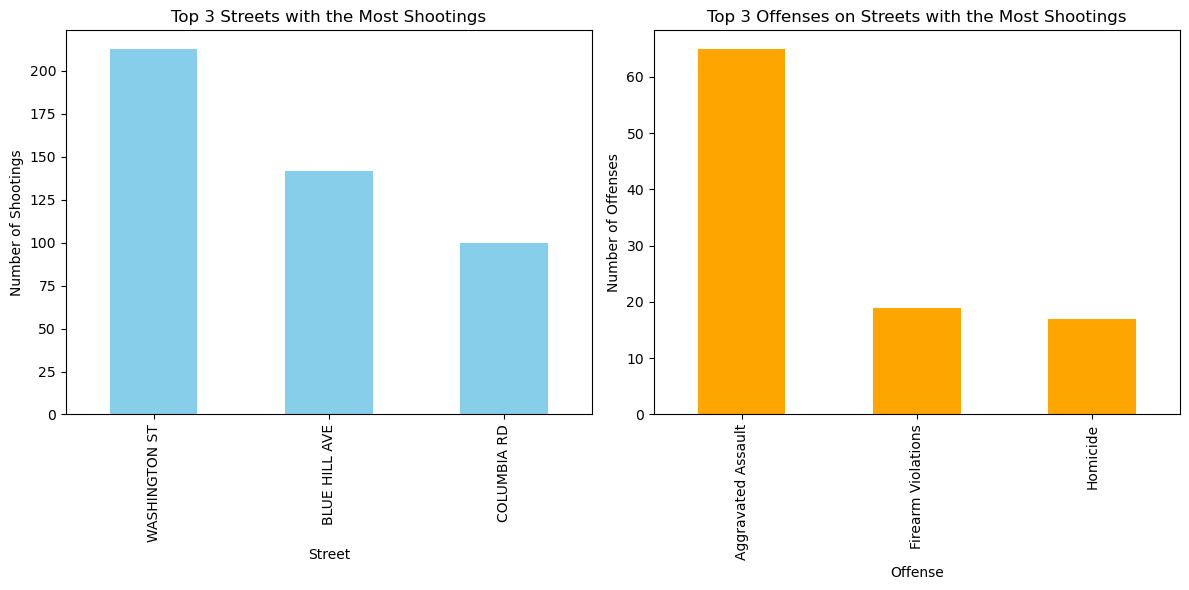

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

def find_shooting_and_offense_stats(file_path):
    try:
        # Read the Excel file into a pandas DataFrame
        df = pd.read_excel(file_path)
    except FileNotFoundError:
        return f"File not found at path: {file_path}"
    except pd.errors.EmptyDataError:
        return f"The file at path {file_path} is empty."

    # Check if the required columns exist in the DataFrame
    required_columns = ["SHOOTING", "STREET", "OFFENSE_CODE_GROUP"]
    for col in required_columns:
        if col not in df.columns:
            return f"Column '{col}' not found in the dataset."

    # Filter out rows with zero values in the "SHOOTING" column
    non_zero_shootings_df = df[df["SHOOTING"] != 0]

    # Group by "STREET" and calculate the total number of shootings in each street
    street_shooting_counts = non_zero_shootings_df.groupby("STREET")["SHOOTING"].count()

    # Get the top 3 streets with the most and least shootings
    top3_most_shootings = street_shooting_counts.sort_values(ascending=False).head(3)
    top3_least_shootings = street_shooting_counts.sort_values(ascending=True).head(3)

    # Filter the DataFrame to include only the top 3 streets
    top3_most_df = non_zero_shootings_df[non_zero_shootings_df["STREET"].isin(top3_most_shootings.index)]
    top3_least_df = non_zero_shootings_df[non_zero_shootings_df["STREET"].isin(top3_least_shootings.index)]

    # Group by "OFFENSE_CODE_GROUP" and calculate the total number of offenses in each category
    top3_most_offense_counts = top3_most_df.groupby("OFFENSE_CODE_GROUP")["SHOOTING"].count()
    top3_least_offense_counts = top3_least_df.groupby("OFFENSE_CODE_GROUP")["SHOOTING"].count()

    # Get the top 3 offenses for both most and least shootings
    top3_most_offenses = top3_most_offense_counts.sort_values(ascending=False).head(3)
    top3_least_offenses = top3_least_offense_counts.sort_values(ascending=False).head(3)

    # Plot bar graphs
    plt.figure(figsize=(12, 6))

    # Bar graph for streets with the most shootings
    plt.subplot(1, 2, 1)
    top3_most_shootings.plot(kind='bar', color='skyblue')
    plt.title('Top 3 Streets with the Most Shootings')
    plt.xlabel('Street')
    plt.ylabel('Number of Shootings')

    # Bar graph for offenses on streets with the most shootings
    plt.subplot(1, 2, 2)
    top3_most_offenses.plot(kind='bar', color='orange')
    plt.title('Top 3 Offenses on Streets with the Most Shootings')
    plt.xlabel('Offense')
    plt.ylabel('Number of Offenses')

    plt.tight_layout()
    plt.show()

    return top3_most_shootings, top3_most_offenses, top3_least_shootings, top3_least_offenses

# Example usage:
excel_file_path = r"D:\General\UMass Dartmouth\Subjects\Fall 2023 - MTH 522 - Mathematical Statistics\Project 3\customdataset.xlsx"
top3_most_shootings, top3_most_offenses, top3_least_shootings, top3_least_offenses = find_shooting_and_offense_stats(excel_file_path)


In [9]:
import pandas as pd

def find_most_common_shooting_time(file_path):
    try:
        # Read the Excel file into a pandas DataFrame
        df = pd.read_excel(file_path)
    except FileNotFoundError:
        return f"File not found at path: {file_path}"
    except pd.errors.EmptyDataError:
        return f"The file at path {file_path} is empty."

    # Check if the required columns exist in the DataFrame
    required_columns = ["SHOOTING", "OCCURRED_ON_DATE", "MONTH", "DAY_OF_WEEK", "HOUR"]
    for col in required_columns:
        if col not in df.columns:
            return f"Column '{col}' not found in the dataset."

    # Filter out rows with zero values in the "SHOOTING" column
    non_zero_shootings_df = df[df["SHOOTING"] != 0]

    # Group by "MONTH", "DAY_OF_WEEK", and "HOUR" and calculate the total number of shootings in each time slot
    shooting_time_counts = non_zero_shootings_df.groupby(["MONTH", "DAY_OF_WEEK", "HOUR"])["SHOOTING"].count()

    # Find the most common time for shootings
    most_common_time = shooting_time_counts.idxmax()

    return most_common_time

# Example usage:
excel_file_path = r"D:\General\UMass Dartmouth\Subjects\Fall 2023 - MTH 522 - Mathematical Statistics\Project 3\customdataset.xlsx"
most_common_shooting_time = find_most_common_shooting_time(excel_file_path)

print("Most Common Time for Shootings:")
print(f"Month: {most_common_shooting_time[0]}, Day of Week: {most_common_shooting_time[1]}, Hour: {most_common_shooting_time[2]}")


C:\Users\prkav\AppData\Local\Temp\ipykernel_24632\3380012862.py:6: FutureWarning: Inferring datetime64[ns, UTC] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns, UTC])
  df = pd.read_excel(file_path)


Most Common Time for Shootings:
Month: 6.0, Day of Week: Saturday, Hour: 0.0


# 2. What types of crimes are being committed (UCR Analysis)

C:\Users\prkav\AppData\Local\Temp\ipykernel_24632\165911848.py:8: FutureWarning: Inferring datetime64[ns, UTC] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns, UTC])
  df = pd.read_excel(file_path)


Unique values and their percentages in the column 'UCR_PART':
Part Three    49.848226
Part Two      30.483979
Part One      19.274202
Other          0.393594
Name: UCR_PART, dtype: float64


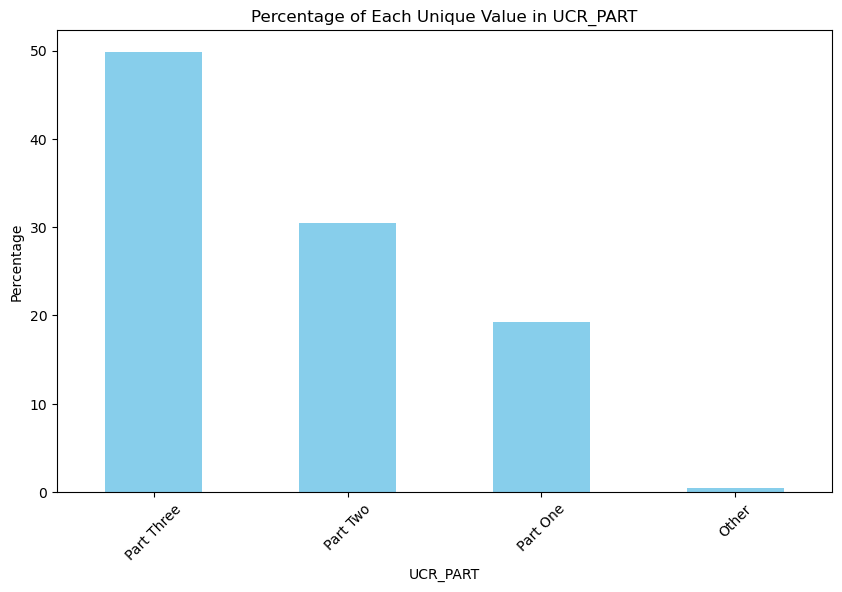

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the Excel file
file_path = r'D:\General\UMass Dartmouth\Subjects\Fall 2023 - MTH 522 - Mathematical Statistics\Project 3\customdataset.xlsx'

# Load the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Specify the column name for which you want to find unique values
column_name = 'UCR_PART'

# Get unique values in the specified column
unique_values = df[column_name].unique()

# Calculate the percentage of each unique value
value_counts = df[column_name].value_counts(normalize=True) * 100

# Print the unique values and their corresponding percentages
print("Unique values and their percentages in the column '{}':".format(column_name))
print(value_counts)

# Visualize the percentages on a bar graph
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Percentage of Each Unique Value in {}'.format(column_name))
plt.xlabel(column_name)
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()


C:\Users\prkav\AppData\Local\Temp\ipykernel_24632\1986964540.py:8: FutureWarning: Inferring datetime64[ns, UTC] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns, UTC])
  df = pd.read_excel(file_path)


UCR_PART: nan
Top 3 offense percentages:
Series([], Name: OFFENSE_CODE_GROUP, dtype: float64)




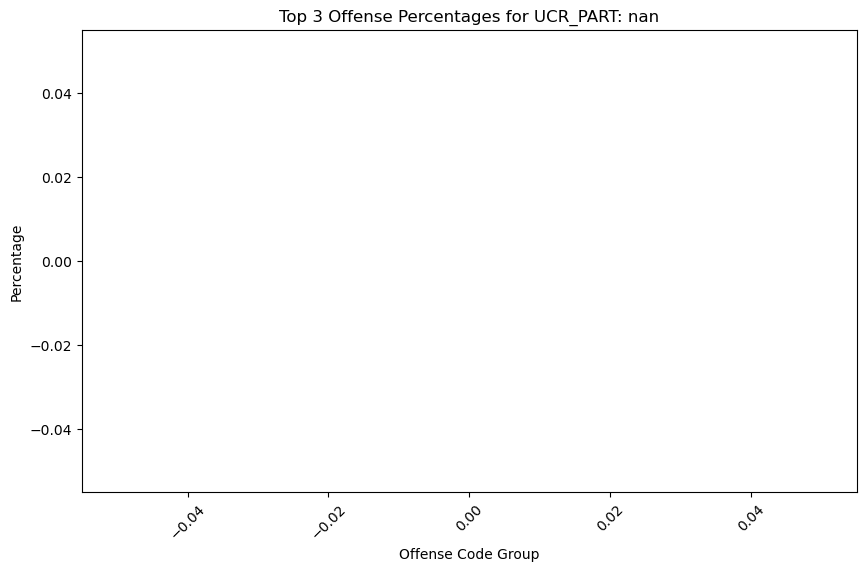

UCR_PART: Part Two
Top 3 offense percentages:
Other             17.430519
Drug Violation    16.864829
Simple Assault    16.284276
Name: OFFENSE_CODE_GROUP, dtype: float64




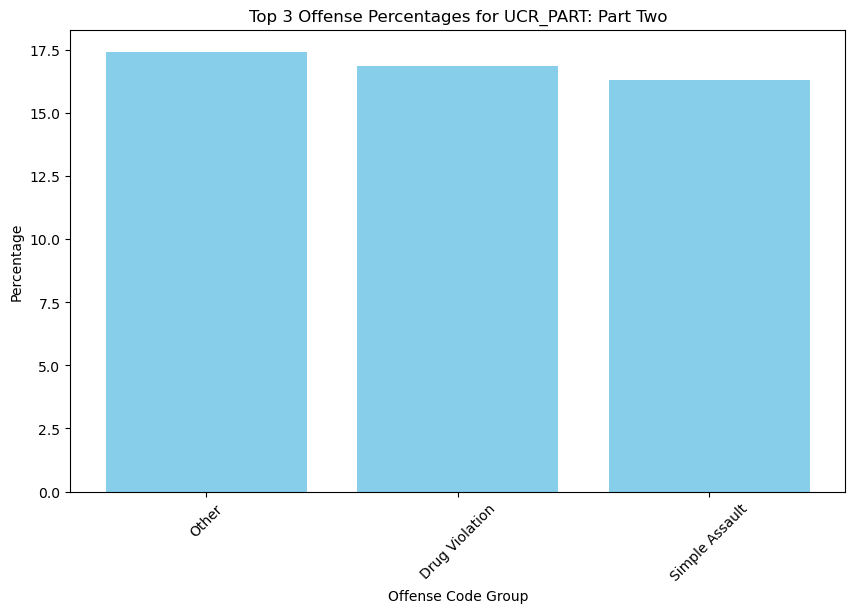

UCR_PART: Part Three
Top 3 offense percentages:
Motor Vehicle Accident Response    23.326252
Medical Assistance                 14.889061
Investigate Person                 11.599505
Name: OFFENSE_CODE_GROUP, dtype: float64




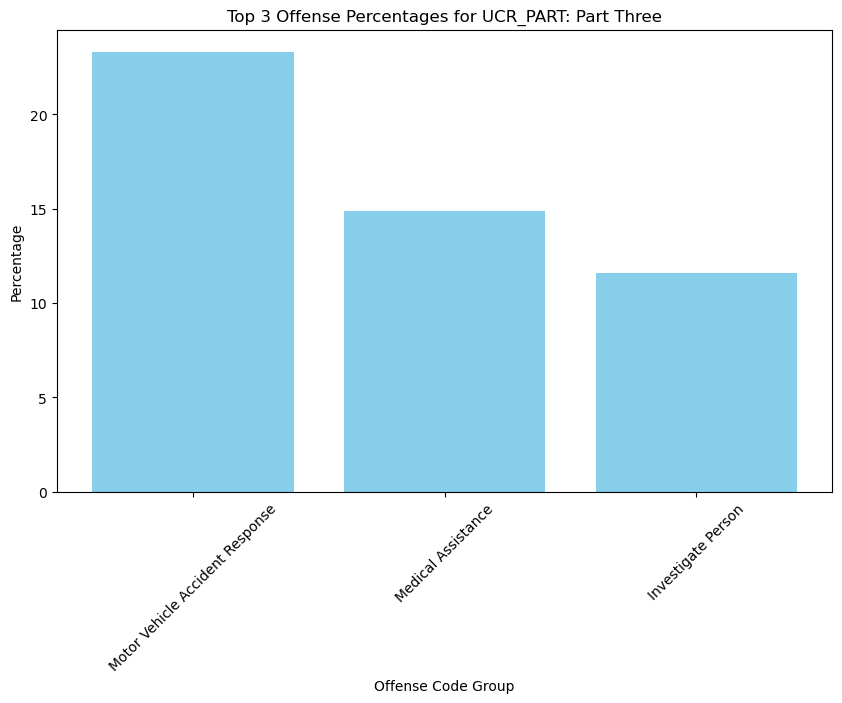

UCR_PART: Part One
Top 3 offense percentages:
Larceny                       42.466357
Larceny From Motor Vehicle    17.466357
Aggravated Assault            12.856261
Name: OFFENSE_CODE_GROUP, dtype: float64




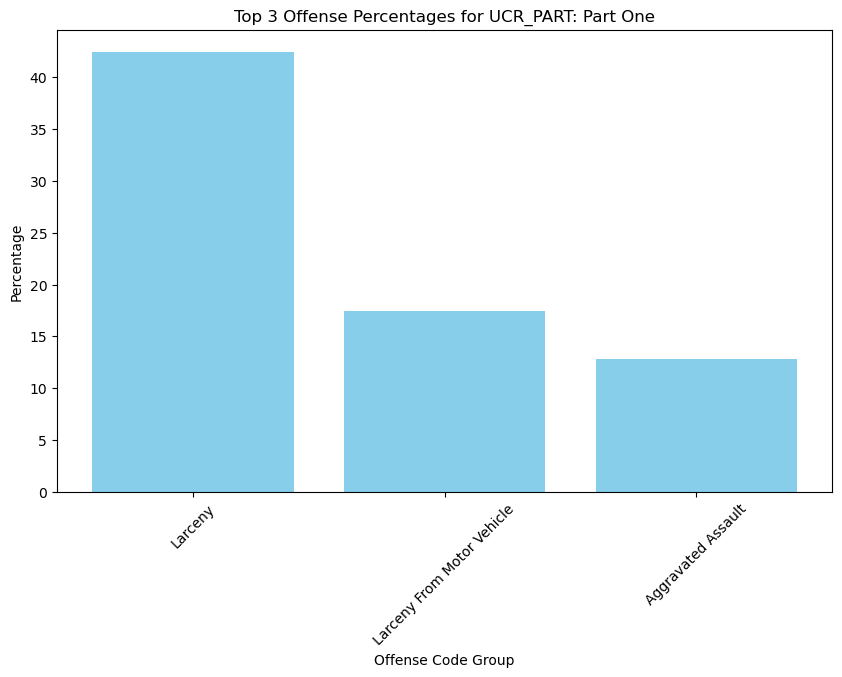

UCR_PART: Other
Top 3 offense percentages:
Auto Theft Recovery                84.100719
Arson                               6.834532
License Plate Related Incidents     5.755396
Name: OFFENSE_CODE_GROUP, dtype: float64




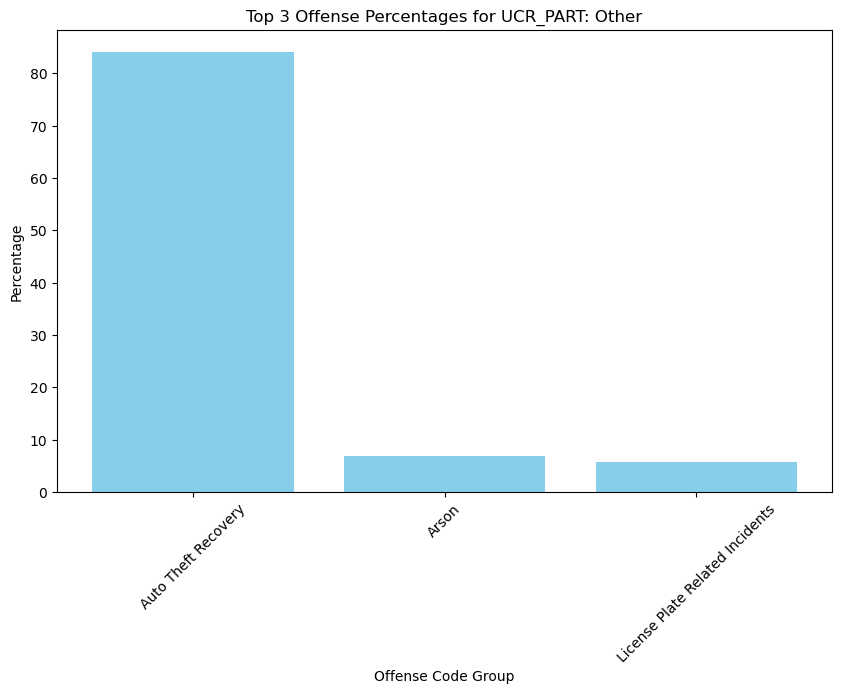

In [13]:
# IN THIS GRAPH THAT YOU NEED TO INLCUDE IS OF UCR PART 1 AND PAR 2


import pandas as pd
import matplotlib.pyplot as plt

# Path to the Excel file
file_path = r'D:\General\UMass Dartmouth\Subjects\Fall 2023 - MTH 522 - Mathematical Statistics\Project 3\customdataset.xlsx'

# Load the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Specify the columns for analysis
ucr_part_column = 'UCR_PART'
offense_code_group_column = 'OFFENSE_CODE_GROUP'

# Get unique values in the 'UCR_PART' column
unique_values = df[ucr_part_column].unique()

# Iterate through unique values in the 'UCR_PART' column
for ucr_part_value in unique_values:
    # Filter the DataFrame for the current 'UCR_PART' value
    ucr_part_df = df[df[ucr_part_column] == ucr_part_value]
    
    # Calculate the percentage of each offense within the current 'UCR_PART' value
    offense_percentage = ucr_part_df[offense_code_group_column].value_counts(normalize=True) * 100
    
    # Get the top 3 offenses
    top3_offenses = offense_percentage.head(3)
    
    # Print the results
    print("UCR_PART: {}".format(ucr_part_value))
    print("Top 3 offense percentages:")
    print(top3_offenses)
    print("\n")

    # Visualize the top 3 offenses using a bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(top3_offenses.index, top3_offenses, color='skyblue')
    plt.title('Top 3 Offense Percentages for UCR_PART: {}'.format(ucr_part_value))
    plt.xlabel('Offense Code Group')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.show()


C:\Users\prkav\AppData\Local\Temp\ipykernel_24632\2937566755.py:8: FutureWarning: Inferring datetime64[ns, UTC] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns, UTC])
  df = pd.read_excel(file_path)


UCR_PART: nan
Top 3 street percentages:
Series([], Name: STREET, dtype: float64)




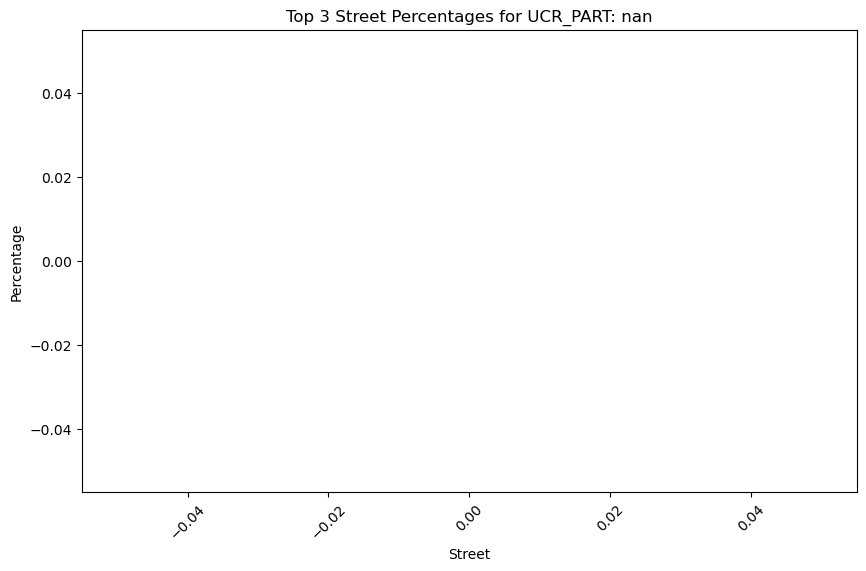

UCR_PART: Part Two
Top 3 street percentages:
WASHINGTON ST    5.324034
BLUE HILL AVE    2.904106
BOYLSTON ST      2.261418
Name: STREET, dtype: float64




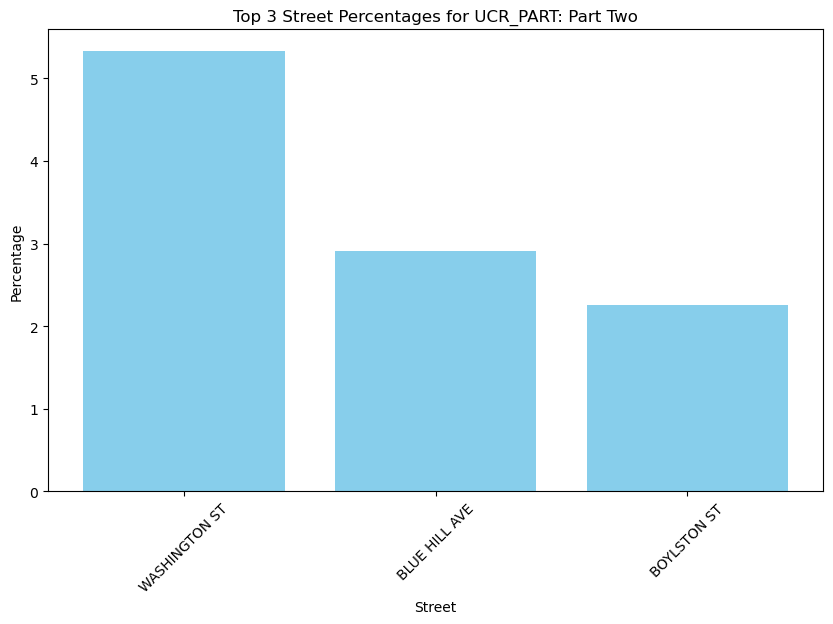

UCR_PART: Part Three
Top 3 street percentages:
WASHINGTON ST     3.947864
BLUE HILL AVE     2.384260
DORCHESTER AVE    1.579499
Name: STREET, dtype: float64




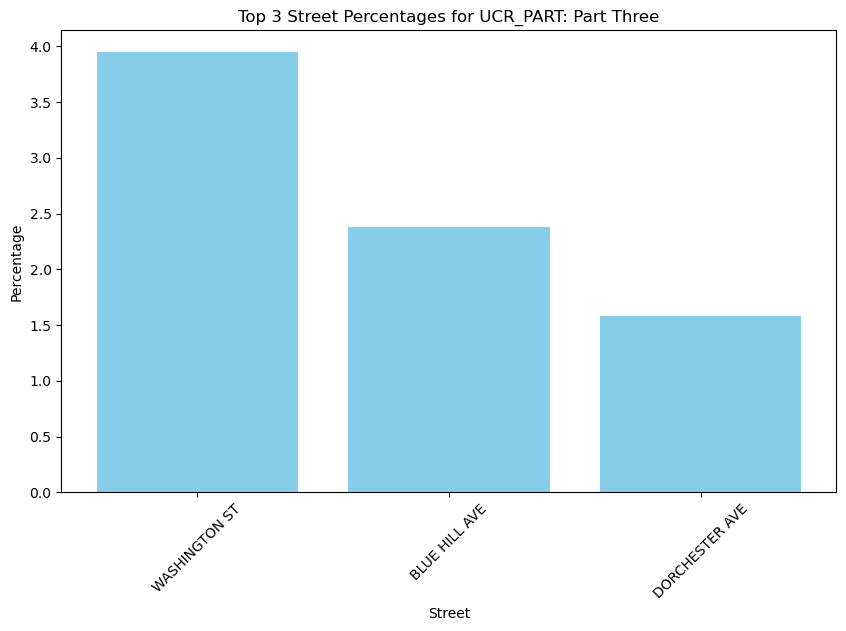

UCR_PART: Part One
Top 3 street percentages:
WASHINGTON ST    5.304144
BOYLSTON ST      4.525403
BLUE HILL AVE    2.297212
Name: STREET, dtype: float64




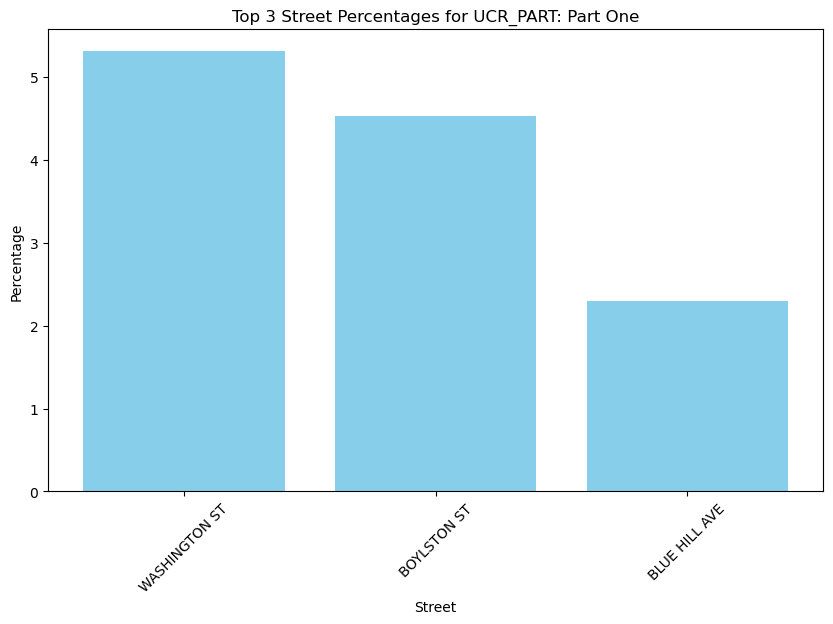

UCR_PART: Other
Top 3 street percentages:
FRONTAGE RD          3.860431
BLUE HILL AVE        2.524128
MASSACHUSETTS AVE    2.375650
Name: STREET, dtype: float64




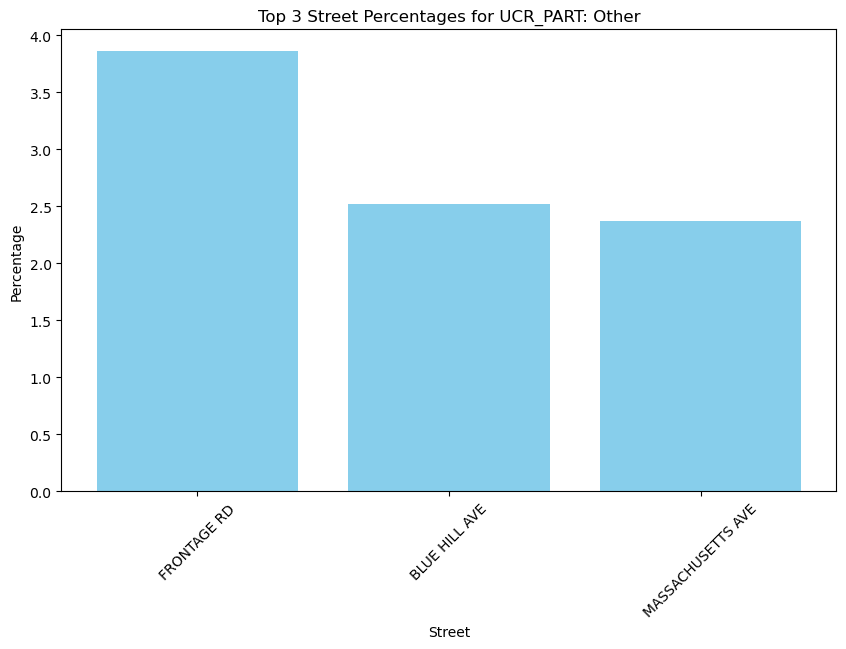

In [14]:
# IN THIS GRAPH THAT YOU NEED TO INLCUDE IS OF UCR PART 1 AND PAR 2


import pandas as pd
import matplotlib.pyplot as plt

# Path to the Excel file
file_path = r'D:\General\UMass Dartmouth\Subjects\Fall 2023 - MTH 522 - Mathematical Statistics\Project 3\customdataset.xlsx'

# Load the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Specify the columns for analysis
ucr_part_column = 'UCR_PART'
street_column = 'STREET'

# Get unique values in the 'UCR_PART' column
unique_values = df[ucr_part_column].unique()

# Iterate through unique values in the 'UCR_PART' column
for ucr_part_value in unique_values:
    # Filter the DataFrame for the current 'UCR_PART' value
    ucr_part_df = df[df[ucr_part_column] == ucr_part_value]
    
    # Calculate the percentage of each street within the current 'UCR_PART' value
    street_percentage = ucr_part_df[street_column].value_counts(normalize=True) * 100
    
    # Get the top 3 streets
    top3_streets = street_percentage.head(3)
    
    # Print the results
    print("UCR_PART: {}".format(ucr_part_value))
    print("Top 3 street percentages:")
    print(top3_streets)
    print("\n")

    # Visualize the top 3 streets using a bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(top3_streets.index, top3_streets, color='skyblue')
    plt.title('Top 3 Street Percentages for UCR_PART: {}'.format(ucr_part_value))
    plt.xlabel('Street')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.show()


In [17]:
import pandas as pd

# Define the path to the Excel file
file_path = r'D:\General\UMass Dartmouth\Subjects\Fall 2023 - MTH 522 - Mathematical Statistics\Project 3\customdataset.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Specify the target column for unique values
target_column = 'UCR_PART'

# Extract unique values from the specified column
unique_values = df[target_column].unique()

# Display unique values in the chosen column
print(f"Unique values in the column '{target_column}':")
print(unique_values)

# Specify the column for finding the district with the highest occurrence
district_column = 'DISTRICT'

# Iterate over each unique value in the "UCR_PART" column
for part_value in unique_values:
    # Filter the DataFrame for the current UCR_PART value
    part_df = df[df[target_column] == part_value]
    
    # Check if the DataFrame is not empty before finding the mode
    if not part_df.empty:
        # Find the district with the highest occurrence for the current UCR_PART value
        most_common_district = part_df[district_column].mode().iloc[0]
        
        # Display the result for the current UCR_PART value
        print(f"\nThe district with the highest occurrence in the column '{district_column}' for UCR_PART '{part_value}': {most_common_district}")
    else:
        print(f"\nNo data available for UCR_PART '{part_value}' in the DataFrame.")


C:\Users\prkav\AppData\Local\Temp\ipykernel_24632\3693257527.py:7: FutureWarning: Inferring datetime64[ns, UTC] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns, UTC])
  df = pd.read_excel(file_path)


Unique values in the column 'UCR_PART':
[nan 'Part Two' 'Part Three' 'Part One' 'Other']

No data available for UCR_PART 'nan' in the DataFrame.

The district with the highest occurrence in the column 'DISTRICT' for UCR_PART 'Part Two': B2

The district with the highest occurrence in the column 'DISTRICT' for UCR_PART 'Part Three': B2

The district with the highest occurrence in the column 'DISTRICT' for UCR_PART 'Part One': D4

The district with the highest occurrence in the column 'DISTRICT' for UCR_PART 'Other': B2


# 3. On which streets are the most crimes happening and what type of offences are the most common ? 

C:\Users\prkav\AppData\Local\Temp\ipykernel_24632\2397991687.py:5: FutureWarning: Inferring datetime64[ns, UTC] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns, UTC])
  df = pd.read_excel(r'D:\General\UMass Dartmouth\Subjects\Fall 2023 - MTH 522 - Mathematical Statistics\Project 3\customdataset.xlsx')


          STREET  OFFENSE_CODE_GROUP
       CENTRE ST                  59
   WASHINGTON ST                  59
      TREMONT ST                  57
     BOYLSTON ST                  56
COMMONWEALTH AVE                  56

Top 5 Offense Categories:
Larceny                            15.763470
Motor Vehicle Accident Response     8.838821
Drug Violation                      7.079852
Medical Assistance                  6.593549
Other                               5.809773
Name: OFFENSE_CODE_GROUP, dtype: float64


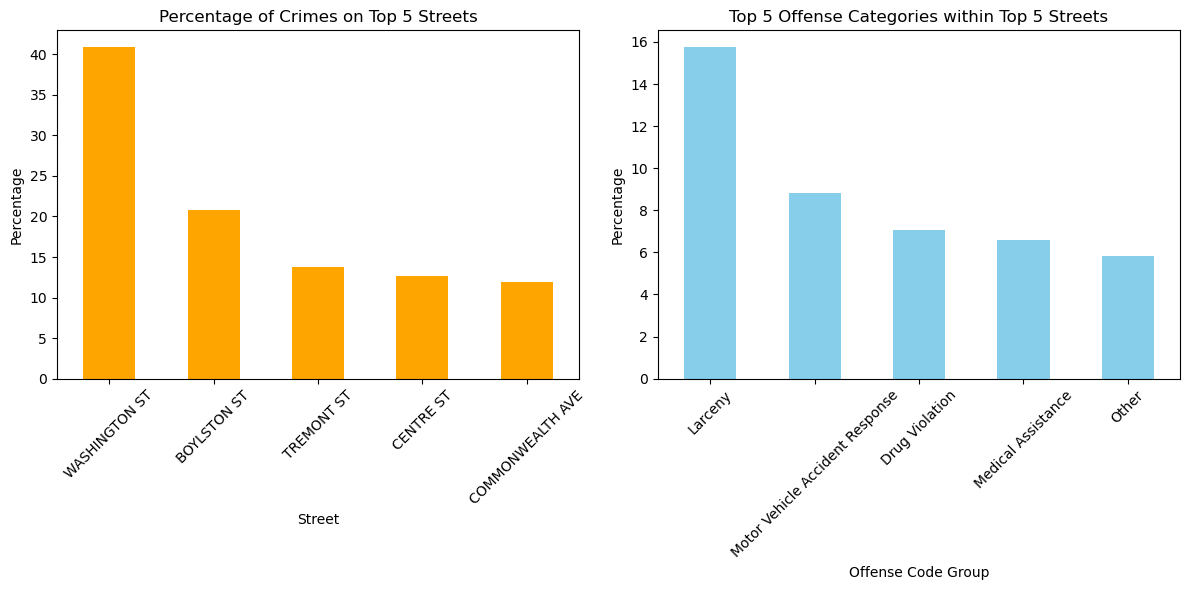

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from an Excel file
df = pd.read_excel(r'D:\General\UMass Dartmouth\Subjects\Fall 2023 - MTH 522 - Mathematical Statistics\Project 3\customdataset.xlsx')

# Remove rows where either 'OFFENSE_CODE_GROUP' or 'STREET' contains integers
# Also, drop rows with missing values in 'OFFENSE_CODE_GROUP' or 'STREET' columns
df_cleaned = df[
    ~df.applymap(lambda x: isinstance(x, (int, float)))['OFFENSE_CODE_GROUP'] &
    ~df.applymap(lambda x: isinstance(x, (int, float)))['STREET']
].dropna(subset=['OFFENSE_CODE_GROUP', 'STREET'])

# Group by street and count unique types of crimes
street_crime_counts = df_cleaned.groupby('STREET')['OFFENSE_CODE_GROUP'].nunique().sort_values(ascending=False)

# Get the top 5 streets
top5_streets = street_crime_counts.head(5).index

# Filter the DataFrame to include only the top 5 streets
df_top5_streets = df_cleaned[df_cleaned['STREET'].isin(top5_streets)]

# Calculate the percentage of each offense category within the top 5 streets
offense_percentage = df_top5_streets['OFFENSE_CODE_GROUP'].value_counts(normalize=True) * 100

# Get the top 5 offense categories
top5_offenses = offense_percentage.head(5)

# Print the result, including the highest to the lowest offenses for the top 5 streets
print(df_top5_streets.groupby('STREET')['OFFENSE_CODE_GROUP'].nunique().sort_values(ascending=False).to_frame().reset_index().to_string(index=False))

# Print the top 5 offense categories
print("\nTop 5 Offense Categories:")
print(top5_offenses)

# Visualize the percentage of crimes on the top 5 streets
plt.figure(figsize=(12, 6))

# Bar graph for the percentage of crimes on the top 5 streets
plt.subplot(1, 2, 1)
street_percentage = df_top5_streets['STREET'].value_counts(normalize=True) * 100
street_percentage.plot(kind='bar', color='orange')
plt.title('Percentage of Crimes on Top 5 Streets')
plt.xlabel('Street')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# Bar graph for the top 5 offense categories
plt.subplot(1, 2, 2)
top5_offenses.plot(kind='bar', color='skyblue')
plt.title('Top 5 Offense Categories within Top 5 Streets')
plt.xlabel('Offense Code Group')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
